In [4]:
# pip install nwdiag

In [5]:
# pip install Pillow==9.5.0

In [9]:
import os
from PIL import Image
from IPython.core.magic import (register_line_magic, register_cell_magic)

@register_cell_magic
def nwdiag(line, cell):
    with open('mynetwork.diag','w') as f:
        f.write(cell)
    os.system('nwdiag mynetwork.diag')
    img=Image.open('mynetwork.png')
    return img

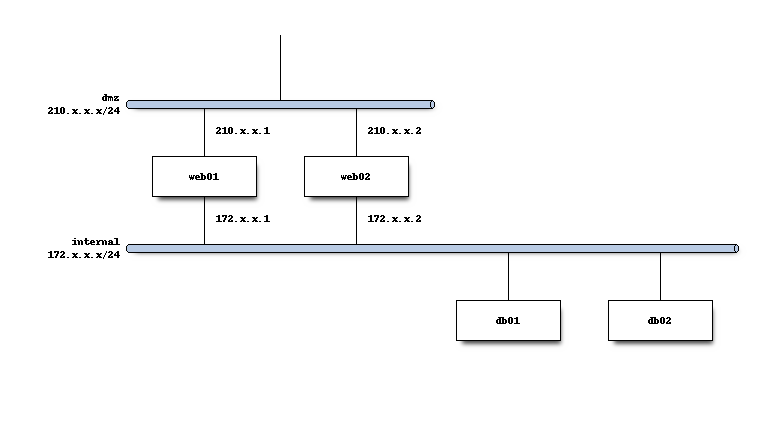

In [16]:
%%nwdiag
nwdiag {
  network dmz {
    address = "210.x.x.x/24"

    web01 [address = "210.x.x.1"];
    web02 [address = "210.x.x.2"];
  }
  network internal {
    address = "172.x.x.x/24";

    web01 [address = "172.x.x.1"];
    web02 [address = "172.x.x.2"];
    db01;
    db02;
  }
}

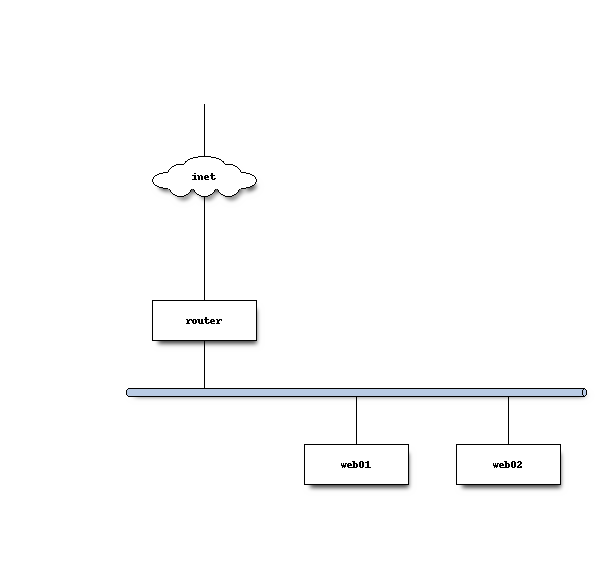

In [17]:
%%nwdiag
nwdiag {
  inet [shape = cloud];
  inet -- router;

  network {
    router;
    web01;
    web02;
  }
}


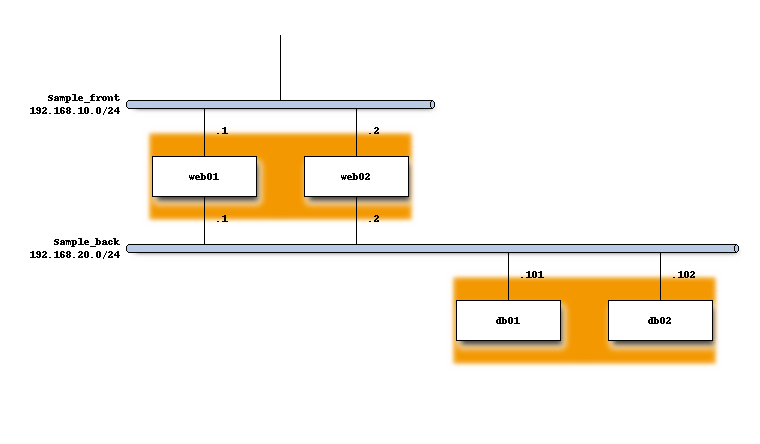

In [21]:
%%nwdiag
nwdiag {
  network Sample_front {
    address = "192.168.10.0/24";

    // define group
    group web {
      web01 [address = ".1"];
      web02 [address = ".2"];
    }
  }
  network Sample_back {
    address = "192.168.20.0/24";
    web01 [address = ".1"];
    web02 [address = ".2"];
    db01 [address = ".101"];
    db02 [address = ".102"];

    // define network using defined nodes
    group db {
      db01;
      db02;
    }
  }
}

ERROR: Unknown attribute: Network.description


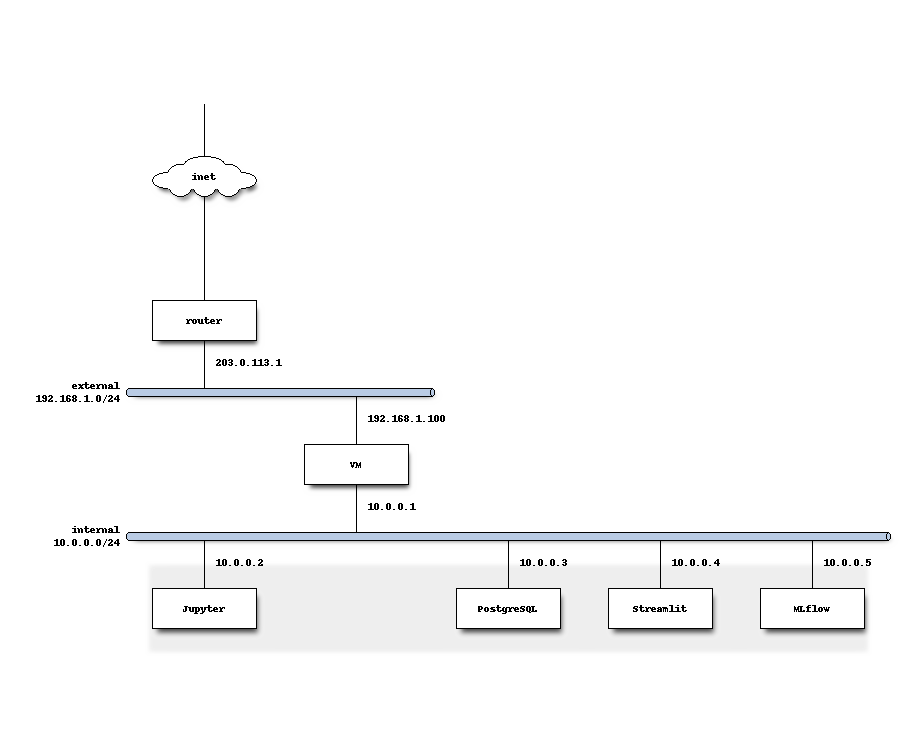

In [33]:
%%nwdiag
nwdiag {
  inet [shape = cloud, description = "Public Internet"];
  inet -- router [label = "Public connection"];

  network external {
    address = "192.168.1.0/24"
    description = "External Network (Public Accessible)";

    VM [address = "192.168.1.100", description = "Virtual Machine"];
    router [address = "203.0.113.1", description = "Gateway Router with Public IP"];
  }

  network internal {
    address = "10.0.0.0/24"
    description = "Internal Network (Private)";

    Jupyter [address = "10.0.0.2", description = "Jupyter Notebook Service"];
    PostgreSQL [address = "10.0.0.3", description = "PostgreSQL Database Service"];
    Streamlit [address = "10.0.0.4", description = "Streamlit App Service"];
    MLflow [address = "10.0.0.5", description = "MLflow Tracking Service"];

    VM [address = "10.0.0.1", description = "Internal Gateway for Containers"];
  }

  group docker_compose {
    color = "#EEEEEE";
    label = "Docker Compose Services";
    Jupyter;
    PostgreSQL;
    Streamlit;
    MLflow;
  }
}


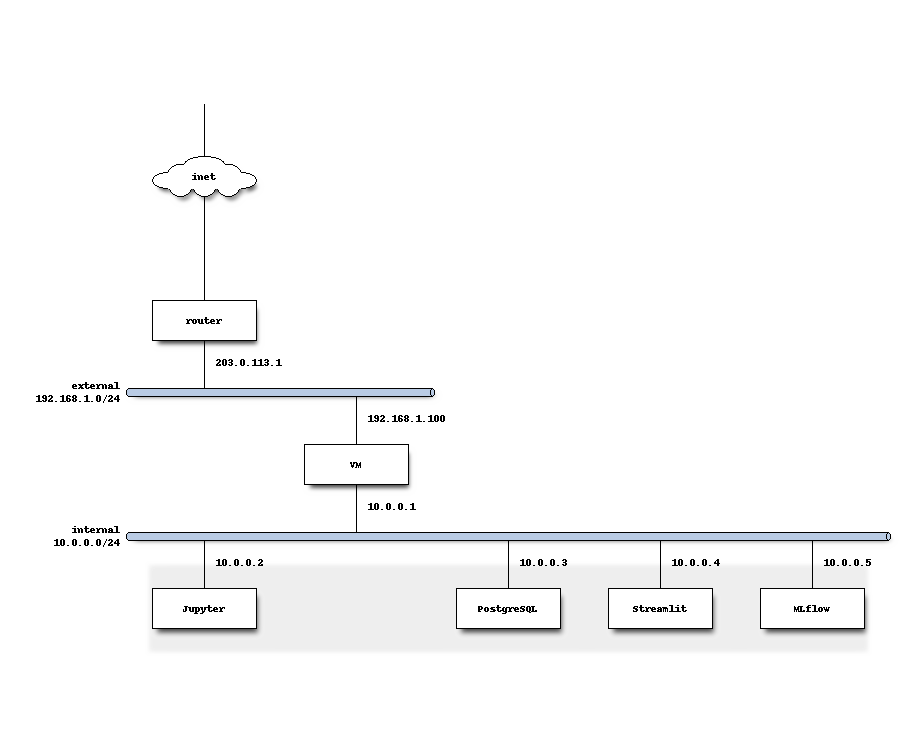

In [32]:
%%nwdiag
nwdiag {
  inet [shape = cloud];
  inet -- router;

  network external {
    address = "192.168.1.0/24"

    VM [address = "192.168.1.100"];
    router [address = "203.0.113.1"];
  }

  network internal {
    address = "10.0.0.0/24"

    Jupyter [address = "10.0.0.2"];
    PostgreSQL [address = "10.0.0.3"];
    Streamlit [address = "10.0.0.4"];
    MLflow [address = "10.0.0.5"];

    VM [address = "10.0.0.1"];
  }

  group docker_compose {
    color = "#EEEEEE";
    Jupyter;
    PostgreSQL;
    Streamlit;
    MLflow;
  }
}
